# Simulating logic gates using `crysx_nn`

## Run the following for Google colab 
then restart runtime

In [ ]:
! pip install --upgrade --no-cache-dir https://github.com/manassharma07/crysx_nn/tarball/main
! pip install IPython==7.7.0

In [1]:
import cupy as cp
import matplotlib.pyplot as plt

## Define some network parameters that we will be using toninitialize the model

In [2]:
nInputs = 2 # No. of nodes in the input layer
neurons_per_layer = [3, 1] # Neurons per layer (excluding the input layer)
activation_func_names = ['Tanh_offset', 'Tanh_offset']
nLayers = len(neurons_per_layer)
nEpochs=10**4
batchSize = 4 # No. of input samples to process at a time for optimization

## Create the neural network model

In [3]:
from crysx_nn import network
model = network.nn_model(nInputs=nInputs, neurons_per_layer=neurons_per_layer, activation_func_names=activation_func_names, batch_size=batchSize, device='GPU', init_method='Xavier') 

C:\Users\manas\anaconda3\envs\crysx_nn\lib\site-packages\crysx_nn\network.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Note: The model will use the following device for all the computations:  GPU


## Check the details of the model for confirmation

In [4]:
model.details()

----------------------------------------------------------------------------------
****Neural Network Model Details****
----------------------------------------------------------------------------------
Number of input nodes:  2
Number of layers (hidden+output):  2
Number of nodes in each layer (hidden & output):  [3, 1]
Activation function for each layer (hidden & output):   ['Tanh_offset', 'Tanh_offset']
Method used for weights and biases initialization:   Xavier
Batch Size:  4
Device:  GPU
Optimization method:  SGD
Learning rate:  0.5
----------------------------------------------------------------------------------


## Visualize the network

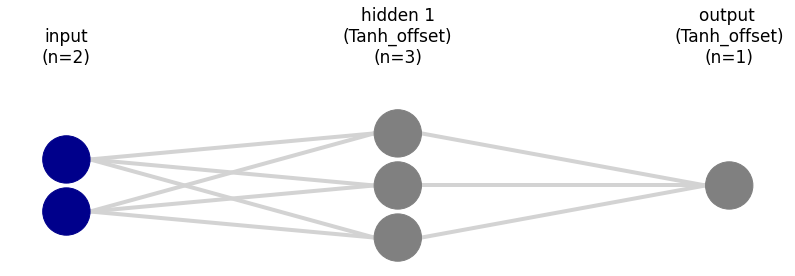

In [5]:
model.visualize()

## Initial Weights and Biases being used by the network

In [6]:
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[ 0.1745025 , -0.47840086],
       [ 0.59259874, -0.4552952 ],
       [ 0.59860295, -0.29500028]], dtype=float32), array([[-0.10403231, -0.45231137,  0.2812883 ]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


## Set the inputs (rows correspond to different set of inputs and columns represent the inputs)

In [7]:
inputs = cp.array([[0.,0.,1.,1.],[0.,1.,0.,1.]]).T.astype(cp.float32)
print(inputs)
print(inputs.dtype)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
float32


## Outputs for different logic gates

In [8]:
# AND function
outputAND = cp.array([0.,0.,0.,1.])
outputAND = cp.asarray([outputAND]).T.astype(cp.float32)
# OR function
outputOR = cp.array([0.,1.,1.,1.])
outputOR = cp.asarray([outputOR]).T.astype(cp.float32)
# NAND function
outputNAND = cp.array([1.,1.,1.,0.])
outputNAND = cp.asarray([outputNAND]).T.astype(cp.float32)
# XOR function
outputXOR = cp.array([0.,1.,1.,0.])
outputXOR = cp.asarray([outputXOR]).T.astype(cp.float32)

In [9]:
print('AND outputs\n', outputAND)
print('OR outputs\n', outputOR)
print('XOR outputs\n', outputXOR)
print('NAND outputs\n', outputNAND)

AND outputs
 [[0.]
 [0.]
 [0.]
 [1.]]
OR outputs
 [[0.]
 [1.]
 [1.]
 [1.]]
XOR outputs
 [[0.]
 [1.]
 [1.]
 [0.]]
NAND outputs
 [[1.]
 [1.]
 [1.]
 [0.]]


## You can also reinitialize weights and biases using some other method

In [10]:
model.init_params(method='NormXavier')
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[ 1.0280049, -0.9200766],
       [ 1.8275586,  0.8882326],
       [ 1.1193669,  1.1371704]], dtype=float32), array([[ 1.8910396, -1.3694699,  1.4202678]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


## You can also define your own custom initial guess and weights

For example, for a neural network with 2 nodes in input layer, 3 nodes in hidden layer and 1 node in output layer use the following commented code

In [11]:
# # Initial guesses for weights
# w1 = 0.30
# w2 = 0.55
# w3 = 0.20
# w4 = 0.45
# w5 = 0.50
# w6 = 0.35
# w7 = 0.15
# w8 = 0.40
# w9 = 0.25

# # Initial guesses for biases
# b1 = 0.60
# b2 = 0.05

# # need to use a list instead of a numpy array, since the 
# #weight matrices at each layer are not of the same dimensions
# weights = [] 
# # Weights for layer 1 --> 2
# weights.append(np.array([[w1,w4],[w2, w5], [w3, w6]]))
# # Weights for layer 2 --> 3
# weights.append(np.array([[w7, w8, w9]]))
# # List of biases at each layer
# biases = []
# biases.append(np.array([b1,b1,b1]))
# biases.append(np.array([b2]))

# weightsOriginal = weights
# biasesOriginal = biases

# print('Weights matrices: ',weights)
# print('Biases: ',biases)

## Train neural network for AND gate
We will use the Mean Squared Error loss function (MSE_loss)

In [12]:

# Run optimization
model.optimize(inputs, outputAND, lr=0.5,nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.54091066


### Visualize the training loss

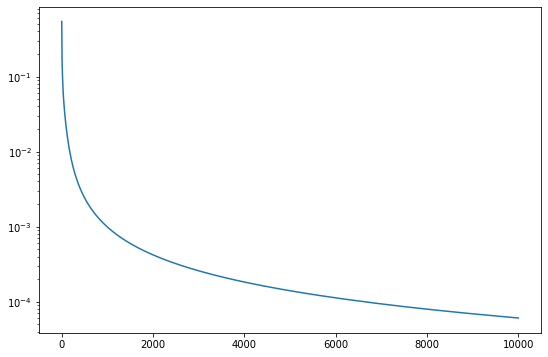

In [13]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [14]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[1.80252   , 0.39444324],
       [1.961678  , 1.178336  ],
       [1.6668369 , 2.4831674 ]], dtype=float32), array([[ 2.1885266, -2.67469  ,  5.1317663]], dtype=float32)]
Optimized Biases:  [array([-1.2386844,  0.9142433, -2.9782174], dtype=float32), array([-1.6499323], dtype=float32)]


### Make predictions using the optimized weights

In [15]:
predictions, error = model.predict(inputs, outputAND, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputAND)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[5.2940845e-04]
 [6.0236156e-03]
 [9.6497834e-03]
 [9.8936331e-01]]
Expected Output:
 [[0.]
 [0.]
 [0.]
 [1.]]
New Average Error with optimized weights:
 6.0705413e-05


## Train neural network for NAND gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [16]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[ 0.3100428 , -0.17556038],
       [-0.30520076, -0.05750105],
       [-0.6010056 , -0.34646428]], dtype=float32), array([[ 0.48814276,  0.510335  , -0.20911005]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


In [17]:

# Run optimization
model.optimize(inputs, outputNAND, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.19261019


### Visualize the training loss

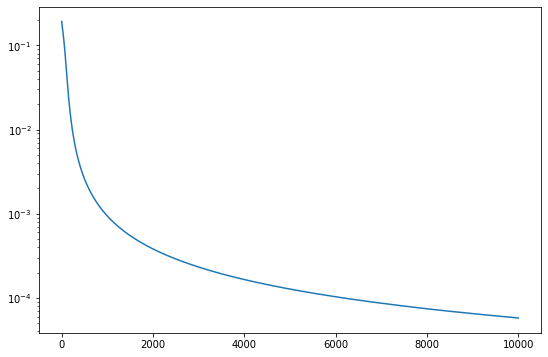

In [18]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [19]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[-0.78697175, -1.6878282 ],
       [-1.9997548 , -1.7591865 ],
       [-1.4759947 , -0.79851025]], dtype=float32), array([[2.4290912, 3.966895 , 2.0230987]], dtype=float32)]
Optimized Biases:  [array([1.3243154, 2.5146039, 1.1897305], dtype=float32), array([-2.9362514], dtype=float32)]


### Make predictions using the optimized weights

In [20]:
predictions, error = model.predict(inputs, outputNAND, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputNAND)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.99996465]
 [0.9932154 ]
 [0.9936603 ]
 [0.01204225]]
Expected Output:
 [[1.]
 [1.]
 [1.]
 [0.]]
New Average Error with optimized weights:
 5.7810088e-05


## Train neural network for OR gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [21]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[ 0.22160925, -0.28278863],
       [ 0.10289662,  0.10420194],
       [ 0.14203024,  0.00547689]], dtype=float32), array([[ 0.02233133, -0.51201653,  0.04166665]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


In [22]:

# Run optimization
model.optimize(inputs, outputOR, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.33186442


### Visualize the training loss

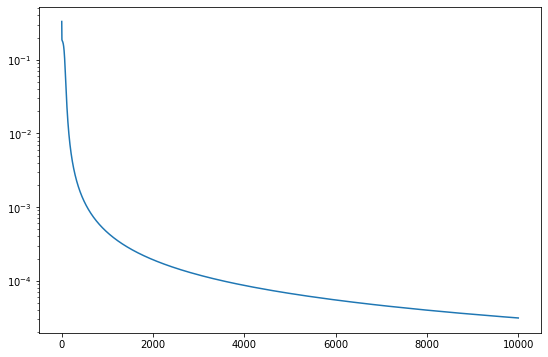

In [23]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [24]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[ 0.9467658,  0.6733468],
       [-1.8212799, -1.901259 ],
       [ 1.7725507,  1.822593 ]], dtype=float32), array([[ 1.0970799, -3.397592 ,  2.9599614]], dtype=float32)]
Optimized Biases:  [array([-0.309415 ,  0.8868156, -0.8534586], dtype=float32), array([-0.3384607], dtype=float32)]


### Make predictions using the optimized weights

In [25]:
predictions, error = model.predict(inputs, outputOR, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputOR)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.00808975]
 [0.994448  ]
 [0.99471164]
 [0.9992837 ]]
Expected Output:
 [[0.]
 [1.]
 [1.]
 [1.]]
New Average Error with optimized weights:
 3.1187155e-05


## Train neural network for XOR gate
We will use the Mean Squared Error loss function (MSE_loss)

## You can reinitialize weights and biases or use the ones optimized for the previous gate for transfer learning

In [26]:
model.init_params()
print('Initial Weights:\n',model.init_weights)
print('Initial Biases:\n',model.init_biases)

Initial Weights:
 [array([[-0.15908705, -0.49341857],
       [-0.3327815 ,  0.4869107 ],
       [ 0.11996263, -0.5425407 ]], dtype=float32), array([[-0.09632013,  0.13279365, -0.26163942]], dtype=float32)]
Initial Biases:
 [array([0., 0., 0.], dtype=float32), array([0.], dtype=float32)]


In [27]:

# Run optimization
model.optimize(inputs, outputXOR, lr=0.5, nEpochs=nEpochs,loss_func_name='MSE', miniterEpoch=1, batchProgressBar=False, miniterBatch=100)


  0%|          | 0/10000 [00:00<?, ?it/s]

Average Error with initial weights and biases: 0.252323


### Visualize the training loss

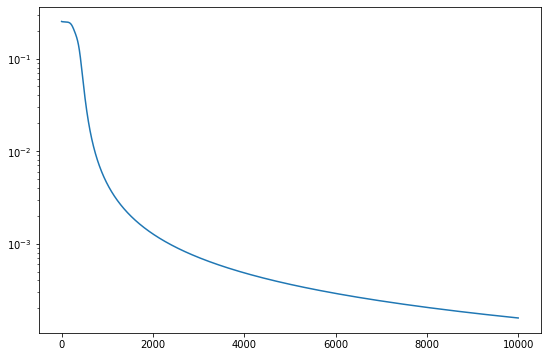

In [28]:
# Plot the error vs epochs
plt.plot(model.errors)
plt.yscale('log')
plt.show()

### Optimized weights and biases

In [29]:
# Optimized weights and biases
print('Optimized Weights: ', model.weights)
print('Optimized Biases: ', model.biases)

Optimized Weights:  [array([[-3.319932 , -3.2174363],
       [-3.4167755,  2.3024077],
       [ 0.8353507, -3.3275812]], dtype=float32), array([[-4.7646613,  4.798673 ,  4.72621  ]], dtype=float32)]
Optimized Biases:  [array([ 1.1254848 , -0.9929211 ,  0.47716346], dtype=float32), array([-2.1745627], dtype=float32)]


### Make predictions using the optimized weights

In [30]:
predictions, error = model.predict(inputs, outputXOR, loss_func_name='MSE')
print('Input:\n',inputs)
print('Prediction:\n',predictions)
print('Expected Output:\n',outputXOR)
print('New Average Error with optimized weights:\n', error)


Input:
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Prediction:
 [[0.00677475]
 [0.9888462 ]
 [0.9872501 ]
 [0.01721698]]
Expected Output:
 [[0.]
 [1.]
 [1.]
 [0.]]
New Average Error with optimized weights:
 0.00015732239
